In [5]:
import bz2
import csv
import os
import chess
import random

In [6]:
from functools import partial

def readlines():
    with open(os.path.abspath(filename), 'rb') as file:
        try:
            for row in csv.reader(_line_reader(file)):
                yield row
        except EOFError:
            return
def _line_reader(file):
    buffer = ''
    decompressor = bz2.BZ2Decompressor()
    reader = partial(file.read, buffer_size)
    for bindata in iter(reader, b''):
        block = decompressor.decompress(bindata).decode("utf-8")
        buffer += block
        if '\n' in buffer:
            lines = buffer.splitlines(True)
            if lines:
                buffer = '' if lines[-1].endswith('\n') else lines.pop()
                for line in lines:
                    yield line

Read in all lichess data into a list.

In [7]:
filename = "lichess_db_puzzle.csv.bz2"
buffer_size = 4*1024

puzzles = []
for row in readlines():
    puzzles.append(row)

print(puzzles[0:10])

[['00008', 'r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - - 0 24', 'f2g3 e6e7 b2b1 b3c1 b1c1 h6c1', '1795', '75', '92', '438', 'crushing hangingPiece long middlegame', 'https://lichess.org/787zsVup/black#48'], ['0000D', '5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - - 2 27', 'd3d6 f8d8 d6d8 f6d8', '1536', '74', '96', '8253', 'advantage endgame short', 'https://lichess.org/F8M8OS71#53'], ['0009B', 'r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP1P/RN1QR1K1 b - - 1 16', 'b6c5 e2g4 h3g4 d1g4', '1111', '75', '85', '498', 'advantage middlegame short', 'https://lichess.org/4MWQCxQ6/black#32'], ['000aY', 'r4rk1/pp3ppp/2n1b3/q1pp2B1/8/P1Q2NP1/1PP1PP1P/2KR3R w - - 0 15', 'g5e7 a5c3 b2c3 c6e7', '1350', '75', '92', '370', 'advantage master middlegame short', 'https://lichess.org/iihZGl6t#29'], ['000hf', 'r1bqk2r/pp1nbNp1/2p1p2p/8/2BP4/1PN3P1/P3QP1P/3R1RK1 b kq - 0 19', 'e8f7 e2e6 f7f8 e6f7', '1326', '74', '100', '260', 'mate mateIn2 middlegame short', 'https://lichess.org/71ygsFeE/black#38'], ['00

Make a random chess board with an FEN from the lichess database.

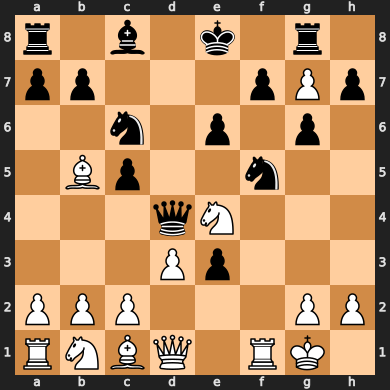

In [8]:
randomPuzzle = random.choice(puzzles)
board = chess.Board(randomPuzzle[1])
board

In [19]:
def reward:
    if board.is_variant_loss():
        return -1
    elif board.is_variant_win():
        return 1
    elif board.is_variant_draw():
        return 0
    else:
        return 0
    

['05lVO', 'r1b1k1r1/pp3pPp/2n1p1p1/1Bp2n2/3qN3/3Pp3/PPP3PP/RNBQ1RK1 w q - 2 13', 'b1c3 e3e2', '932', '77', '99', '1199', 'advancedPawn crushing discoveredAttack middlegame oneMove', 'https://lichess.org/FWvDhEHi#25']
b5c6
b5a6
b5c4
b5a4
e4f6
e4d6
e4g5
e4c5
e4g3
e4c3
e4f2
e4d2
g1h1
f1f5
f1f4
f1f3
f1f2
f1e1
d1h5
d1g4
d1f3
d1e2
d1d2
d1e1
c1e3
c1d2
b1c3
b1a3
b1d2
h2h3
g2g3
c2c3
b2b3
a2a3
h2h4
g2g4
c2c4
b2b4
a2a4
<LegalMoveGenerator at 0x7f4dcbc74550 (Bxc6+, Ba6, Bc4, Ba4, Nf6+, Nd6+, Ng5, Nxc5, Ng3, Nec3, Nf2, Ned2, Kh1, Rxf5, Rf4, Rf3, Rf2, Re1, Qh5, Qg4, Qf3, Qe2, Qd2, Qe1, Bxe3, Bd2, Nbc3, Na3, Nbd2, h3, g3, c3, b3, a3, h4, g4, c4, b4, a4)>
